In [2]:
import ast
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import community as community_louvain
from itertools import combinations

import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [3]:
df = pd.read_csv('data/flu_data_token.csv')
df

,Year,Content,Token
0,2006-2007,When and where did the 2006-07 flu season star...,"['flu', 'season', 'start', 'first', 'report', ..."
1,2007-2008,How severe was the 2007-2008 flu season?: A gr...,"['severe', 'flu', 'season', 'great', 'proporti..."
2,2008-2009,What was the 2009-2010 flu season like?: Flu s...,"['flu', 'season', 'like', 'flu', 'season', 'un..."
3,2010-2011,What was the 2010-2011 flu season like?: In co...,"['flu', 'season', 'like', 'comparison', 'last'..."
4,2011-2012,What was the 2011-2012 flu season like?: In co...,"['flu', 'season', 'like', 'comparison', 'seaso..."
5,2012-2013,What was the 2012-2013 flu season like?: In co...,"['flu', 'season', 'like', 'comparison', 'recen..."
6,2013-2014,When did flu activity peak?: The timing of flu...,"['flu', 'activity', 'peak', 'timing', 'flu', '..."
7,2014-2015,What was the 2014-2015 flu season like?: Compa...,"['flu', 'season', 'like', 'compare', 'previous..."
8,2015-2016,What was the 2015-2016 flu season like?: Flu s...,"['flu', 'season', 'like', 'flu', 'season', 'va..."
9,2016-2017,Information for 2016-2017: Getting an annual f...,"['information', 'get', 'annual', 'flu', 'vacci..."


In [4]:
token: list = df['Token'][0]

In [5]:
token_list = ast.literal_eval(token)

In [6]:
print(token_list)

['flu', 'season', 'start', 'first', 'report', 'regional', 'flu', 'activity', 'come', 'southeastern', 'united', 'states', 'first', 'week', 'november', 'regional', 'flu', 'activity', 'define', 'increase', 'flulike', 'activity', 'flu', 'outbreak', 'least', 'two', 'half', 'region', 'state', 'recent', 'laboratory', 'evidence', 'flu', 'region', 'severe', 'flu', 'season', 'flu', 'season', 'generally', 'mild', 'compare', 'recent', 'flu', 'season', 'example', 'proportion', 'death', 'associate', 'influenza', 'illness', 'low', 'season', 'previous', 'three', 'flu', 'season', 'hospitalization', 'rate', 'among', 'child', 'also', 'low', 'previous', 'three', 'flu', 'season', 'however', 'pediatric', 'death', 'relate', 'influenza', 'report', 'season', 'previous', 'two', 'season', 'nationally', 'low', 'level', 'flu', 'activity', 'report', 'october', 'middecember', 'flu', 'activity', 'increase', 'late', 'december', 'peak', 'midfebruary', 'decrease', 'end', 'flu', 'season', 'may', 'determine', 'severity', 

### Word count

In [7]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist


def word_count(cleaned_tokens):
  # Calculate word frequencies
  word_freq = FreqDist(cleaned_tokens)

  # Convert word frequencies to a DataFrame for seaborn
  data = {'Word': __builtins__.list(word_freq.keys()), 'Frequency': __builtins__.list(word_freq.values())}
  df_word_freq = pd.DataFrame(data)

  # Sort DataFrame by frequency in descending order
  df_word_freq = df_word_freq.sort_values(by='Frequency', ascending=False)
  print(df_word_freq.head(60))

  return df_word_freq

In [8]:
df_word_freq = word_count(token_list)

             Word  Frequency
0             flu         48
33      influenza         34
1          season         31
91          virus         26
31          death         19
41          child         16
170       vaccine         14
6        activity         12
65           year         11
4          report         10
3           first          9
254         novel          8
116           cdc          8
110  fluassociate          6
235          dose          6
85         number          6
52           peak          6
167         match          5
76           test          5
30     proportion          5
43        however          5
40          among          5
131        system          5
111    notifiable          5
178       lineage          5
112     condition          5
21          state          5
150     circulate          5
191           age          5
99        percent          5
155             b          5
46     nationally          4
56            may          4
107        peo

### Word Cloud

In [9]:
def token2word(token):
  word = ' '.join(token)
  return word

In [19]:
word = token2word(token_list)
word

'flu season start first report regional flu activity come southeastern united states first week november regional flu activity define increase flulike activity flu outbreak least two half region state recent laboratory evidence flu region severe flu season flu season generally mild compare recent flu season example proportion death associate influenza illness low season previous three flu season hospitalization rate among child also low previous three flu season however pediatric death relate influenza report season previous two season nationally low level flu activity report october middecember flu activity increase late december peak midfebruary decrease end flu season may determine severity flu season overall health impact eg infection hospitalization death flu season vary year year severity flu season judge accord variety criterion followingnthe geographic extent influenza us within statenthe proportion influenza laboratory test positiventhe proportion visit physician influenzalike

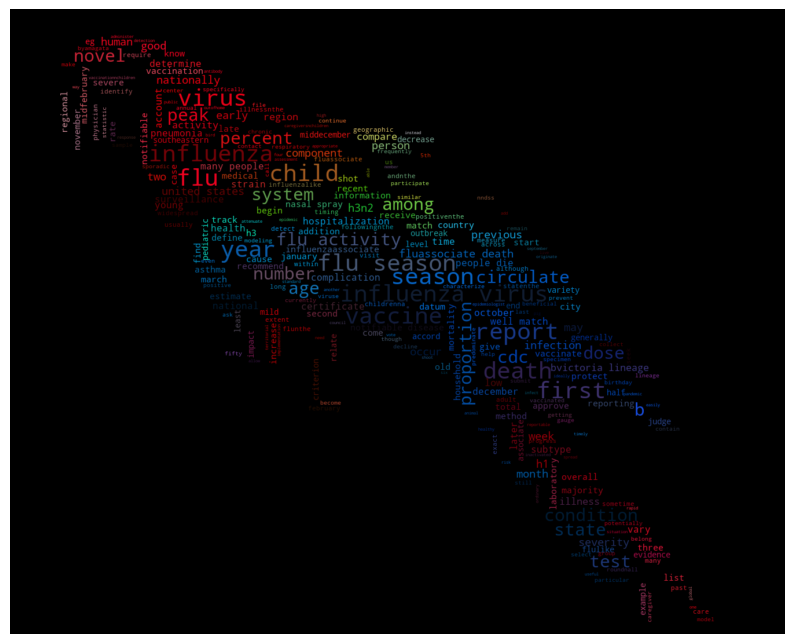

In [25]:
import os
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_gradient_magnitude

from wordcloud import WordCloud, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = os.path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# load wikipedia text on rainbow
text = word

# load image. This has been modified in gimp to be brighter and have more saturation.
parrot_color = np.array(Image.open(os.path.join(d, "parrot-by-jose-mari-gimenez2.jpg")))
# subsample by factor of 3. Very lossy but for a wordcloud we don't really care.
parrot_color = parrot_color[::3, ::3]

# create mask  white is "masked out"
parrot_mask = parrot_color.copy()
parrot_mask[parrot_mask.sum(axis=2) == 0] = 255

# some finesse: we enforce boundaries between colors so they get less washed out.
# For that we do some edge detection in the image
edges = np.mean([gaussian_gradient_magnitude(parrot_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
parrot_mask[edges > .08] = 255

# create wordcloud. A bit sluggish, you can subsample more strongly for quicker rendering
# relative_scaling=0 means the frequencies in the data are reflected less
# acurately but it makes a better picture
wc = WordCloud(max_words=2000, mask=parrot_mask, max_font_size=40, random_state=42, relative_scaling=0)

# generate word cloud
wc.generate(text)
# plt.imshow(wc)

# create coloring from image
image_colors = ImageColorGenerator(parrot_color)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wc, interpolation="bilinear")
wc.to_file("parrot_new.png")

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


def wordcloud_vis(word):
  # Generate word cloud
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(word)

  # Display the generated word cloud using matplotlib
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

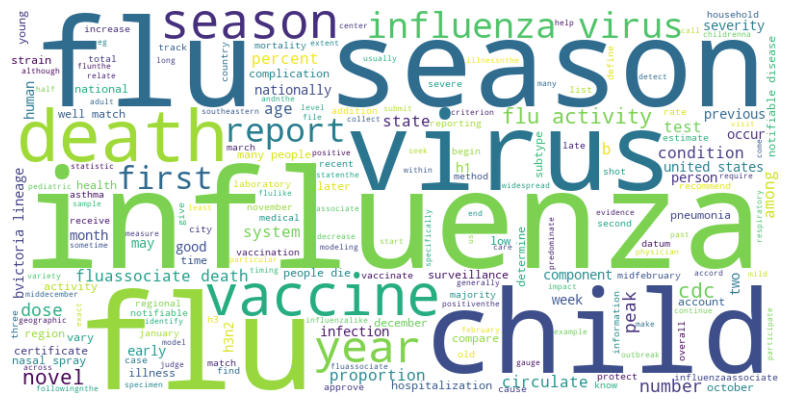

In [12]:
wordcloud_vis(word)

### Bar chart

In [13]:
def bar_chart_vis(token):

  word_freq = FreqDist(token)
  # Convert word frequencies to a DataFrame for seaborn
  data = {'Word': __builtins__.list(word_freq.keys()), 'Frequency': __builtins__.list(word_freq.values())}
  df_word_freq = pd.DataFrame(data)

  # Sort DataFrame by frequency in descending order
  df_word_freq = df_word_freq.sort_values(by='Frequency', ascending=False)

  # Plot a bar chart using seaborn
  plt.figure(figsize=(12, 6))
  sns.barplot(x='Word', y='Frequency', data=df_word_freq.head(20), palette='viridis')
  plt.title('Top 20 Most Frequent Words')
  plt.xlabel('Words')
  plt.ylabel('Frequency')
  plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
  plt.show()

/var/folders/n6/98dby4495lj_l5nmsm3lyr_40000gn/T/ipykernel_59852/3103095750.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Frequency', data=df_word_freq.head(20), palette='viridis')


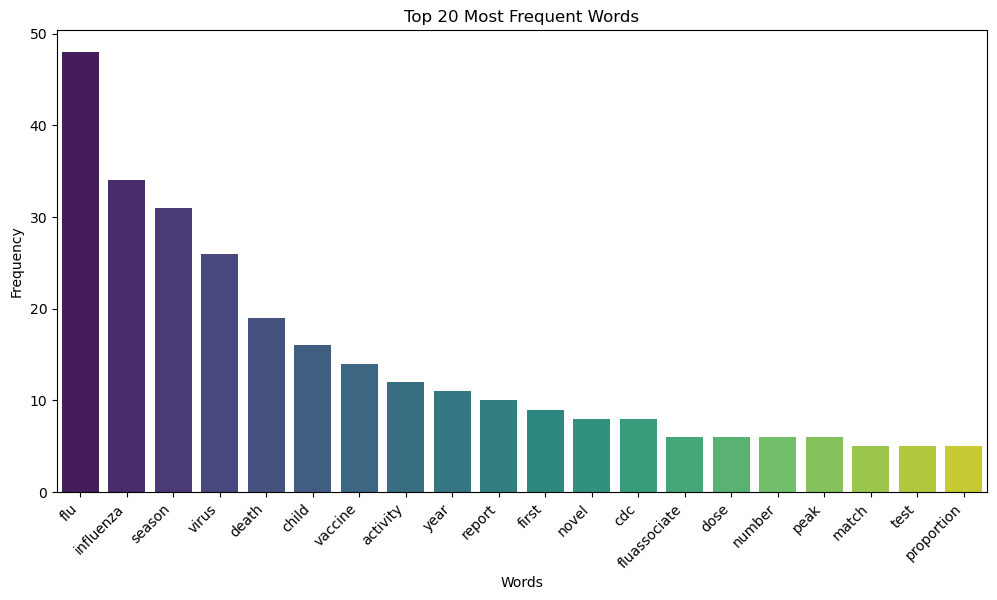

In [14]:
bar_chart_vis(token_list)

### Bubble chart

In [15]:
def bubble_chart_vis(cleaned_tokens):

  # Calculate word frequencies
  word_freq = FreqDist(cleaned_tokens)

  # Create a DataFrame with word frequencies and lengths
  data = {'Word': __builtins__.list(word_freq.keys()), 'Frequency': __builtins__.list(word_freq.values()), 'Length': [len(word) for word in word_freq.keys()]}
  df_word_data = pd.DataFrame(data)

  # Filter out words with frequency less than 2 for better visualization
  df_word_data = df_word_data[df_word_data['Frequency'] >= 2]

  # Plot a bubble chart using seaborn
  plt.figure(figsize=(12, 8))
  sns.scatterplot(x='Length', y='Frequency', size='Frequency', data=df_word_data, hue='Word', sizes=(50, 300), palette='viridis', alpha=0.8)
  plt.title('Bubble Chart of Word Frequencies and Lengths')
  plt.xlabel('Word Length')
  plt.ylabel('Frequency')
  plt.show()

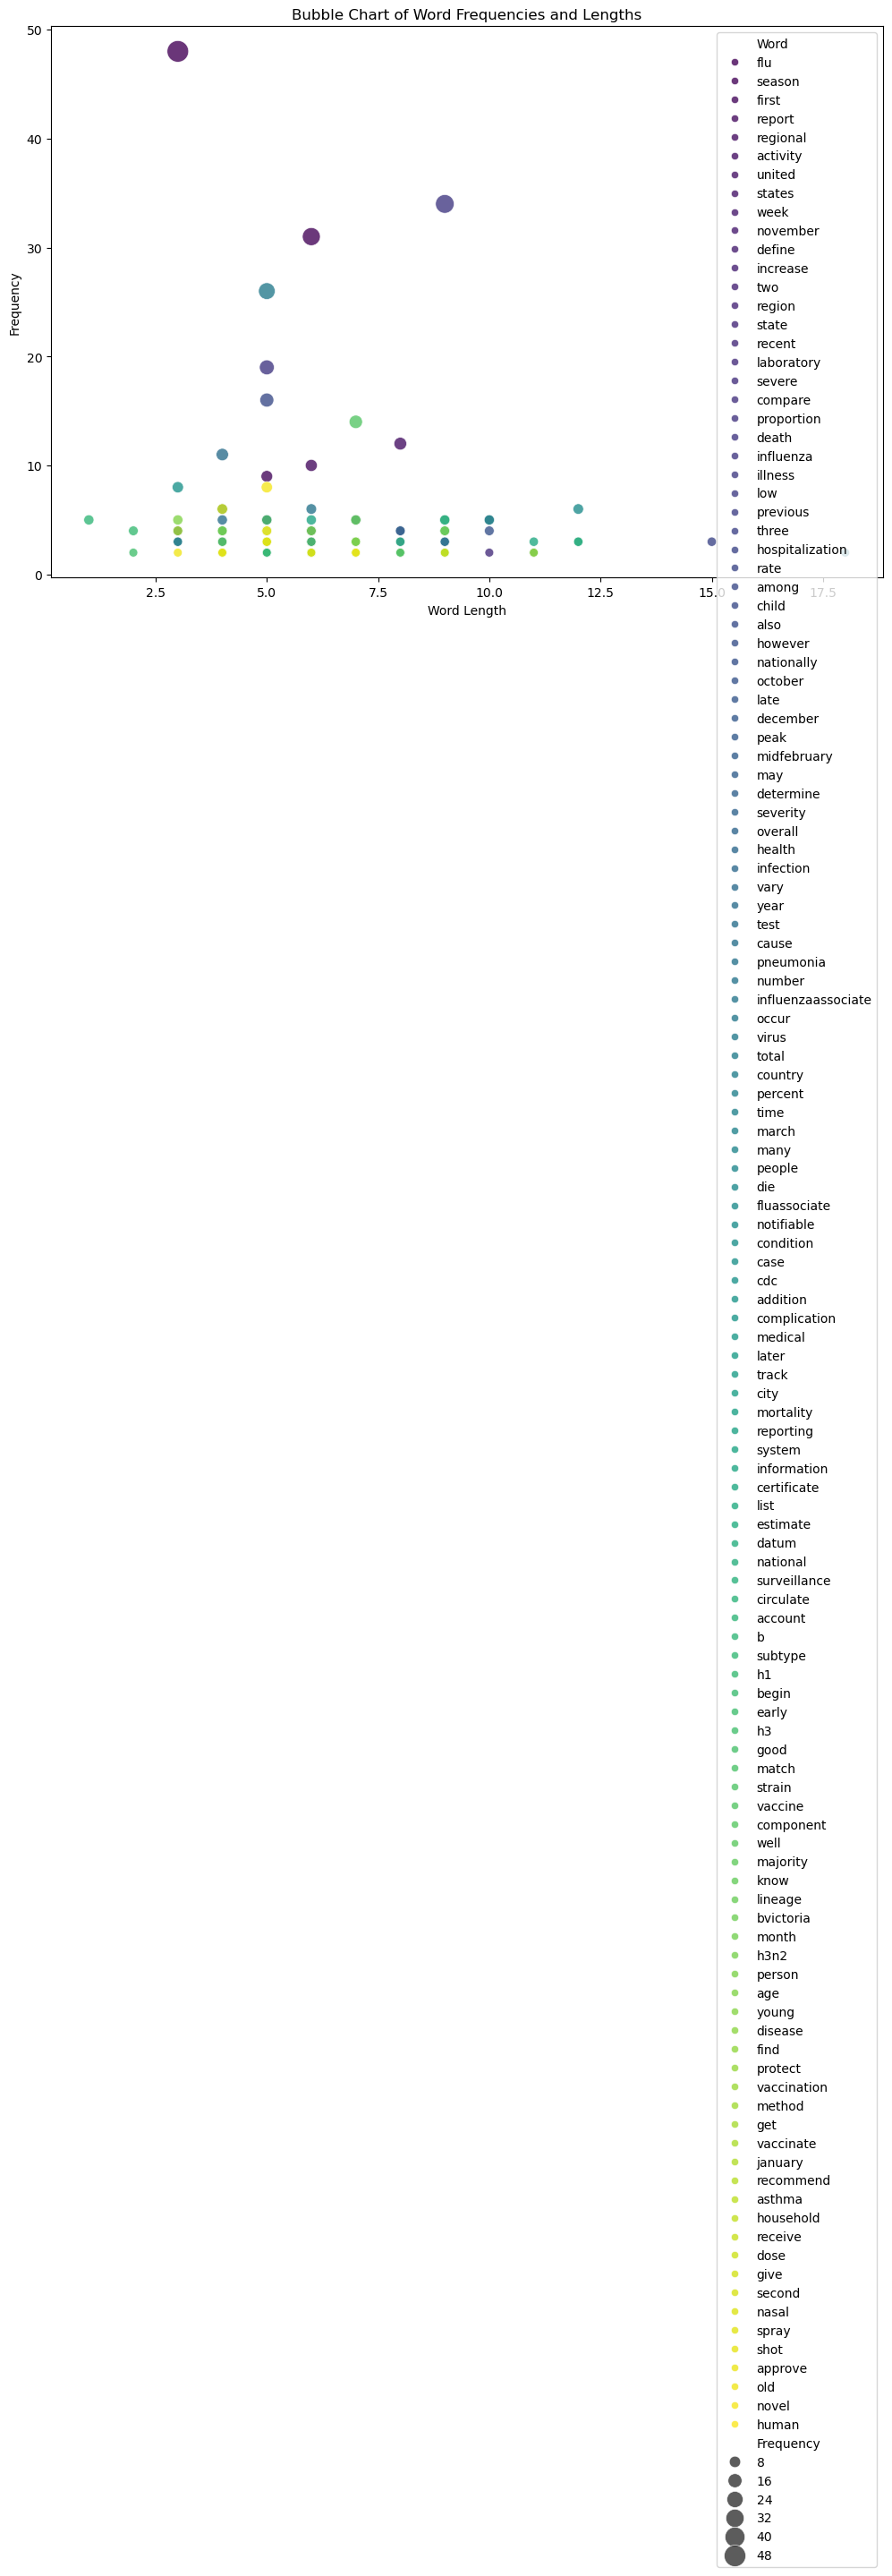

In [16]:
bubble_chart_vis(token_list)

### Network Diagram

In [17]:
def network_vis(df_word_freq):
    token_rank = df_word_freq.head(20)
    tr = token_rank['Word'].tolist()

    # Create a graph using networkx
    G = nx.Graph()

    # Create edges between co-occurring words
    for word1, word2 in combinations(tr, 2):
        if G.has_edge(word1, word2):
            G[word1][word2]['weight'] += 1
        else:
            G.add_edge(word1, word2, weight=1)

    # Detect communities (clusters) in the graph
    partition = community_louvain.best_partition(G)
    # Map each community to a distinct color
    community_colors = [partition[n] for n in G.nodes()]

    # Set node size based on degree (number of connections)
    node_size = [deg * 100 for deg in dict(G.degree()).values()]  # Adjusted size for better visibility

    # Draw the network diagram with community-based coloring
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, seed=42)  # For consistent layout
    nx.draw(G, pos, with_labels=True, font_size=8, node_size=node_size,
            cmap=plt.cm.jet, node_color=community_colors, font_color='white',
            edge_color='gray', font_weight='bold', alpha=0.7)
    plt.title('Text Network Diagram based on Word Co-occurrence with Clustering')
    plt.show()

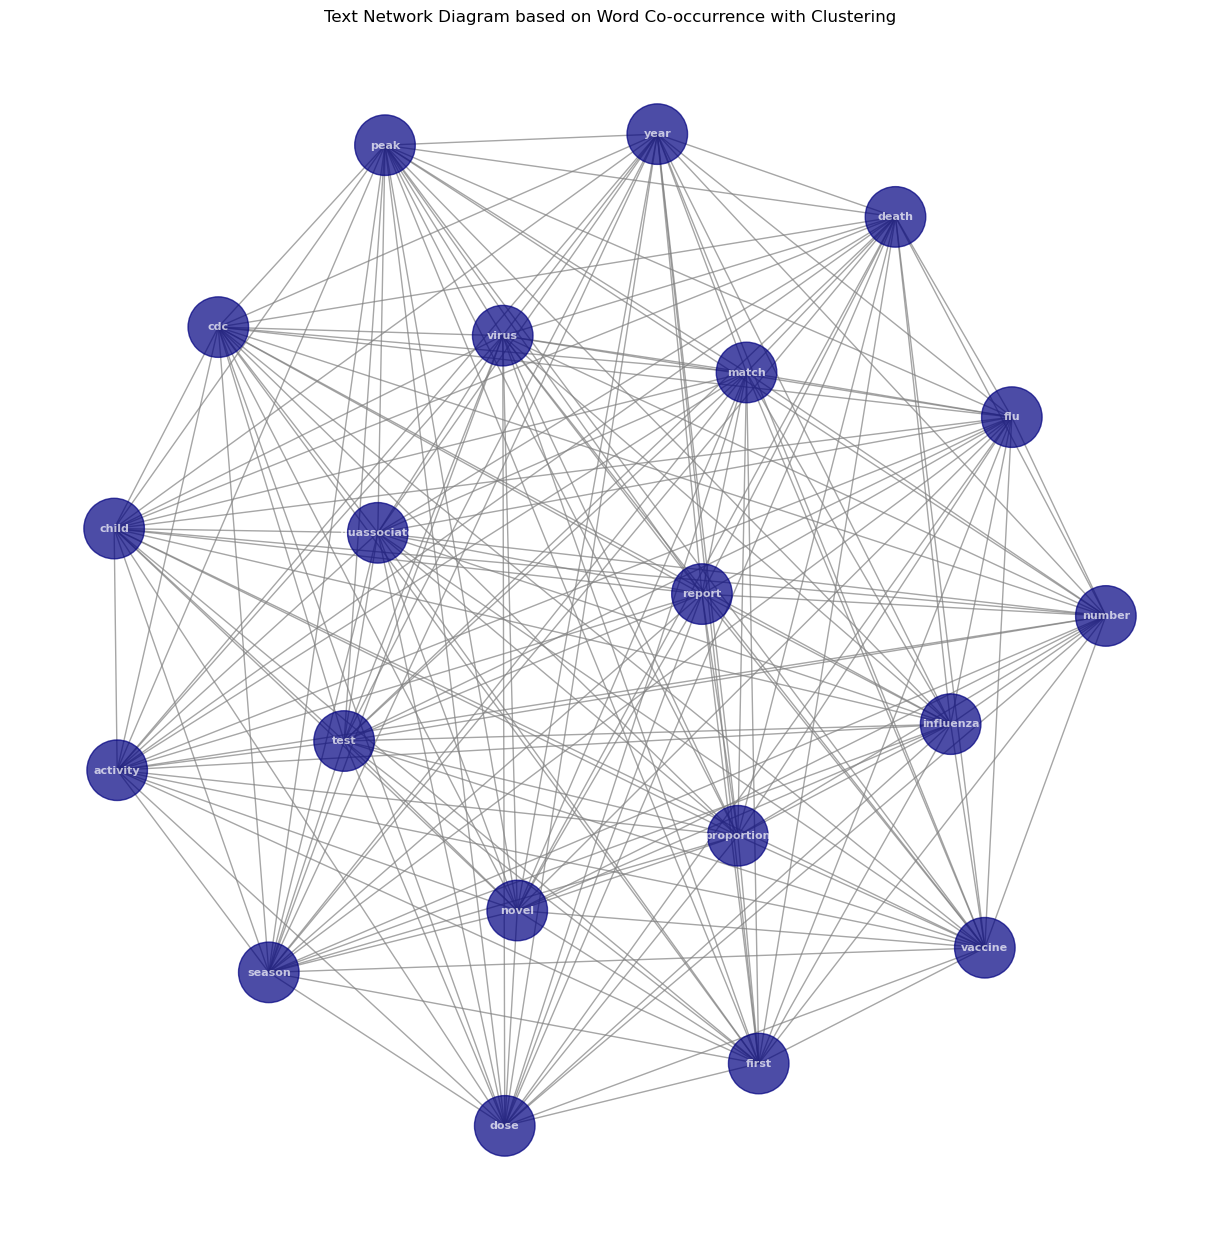

In [18]:
network_vis(df_word_freq)